In [61]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [62]:
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
len(data)

303

# EDA

In [64]:
data.shape 

(303, 14)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [66]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [67]:
data.duplicated().sum()

1

In [68]:
data.drop_duplicates(inplace=True)

In [69]:
data.duplicated().sum()

0

In [70]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [71]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [72]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [73]:
for col in data.columns:
    print (col, ":" , data[col].nunique())
    print (data[col].value_counts().nlargest(5))

age : 41
age
58    19
57    17
54    16
59    14
52    13
Name: count, dtype: int64
sex : 2
sex
1    206
0     96
Name: count, dtype: int64
cp : 4
cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64
trestbps : 49
trestbps
120    37
130    36
140    32
110    19
150    17
Name: count, dtype: int64
chol : 152
chol
204    6
197    6
234    6
212    5
254    5
Name: count, dtype: int64
fbs : 2
fbs
0    257
1     45
Name: count, dtype: int64
restecg : 3
restecg
1    151
0    147
2      4
Name: count, dtype: int64
thalach : 91
thalach
162    11
160     9
163     9
152     8
125     7
Name: count, dtype: int64
exang : 2
exang
0    203
1     99
Name: count, dtype: int64
oldpeak : 40
oldpeak
0.0    98
1.2    17
1.0    14
0.6    14
1.4    13
Name: count, dtype: int64
slope : 3
slope
2    141
1    140
0     21
Name: count, dtype: int64
ca : 5
ca
0    175
1     65
2     38
3     20
4      4
Name: count, dtype: int64
thal : 4
thal
2    165
3    117
1     18
0      2
Name: count, dtype:

# Analysis & Visualiation

C:\Users\purab\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


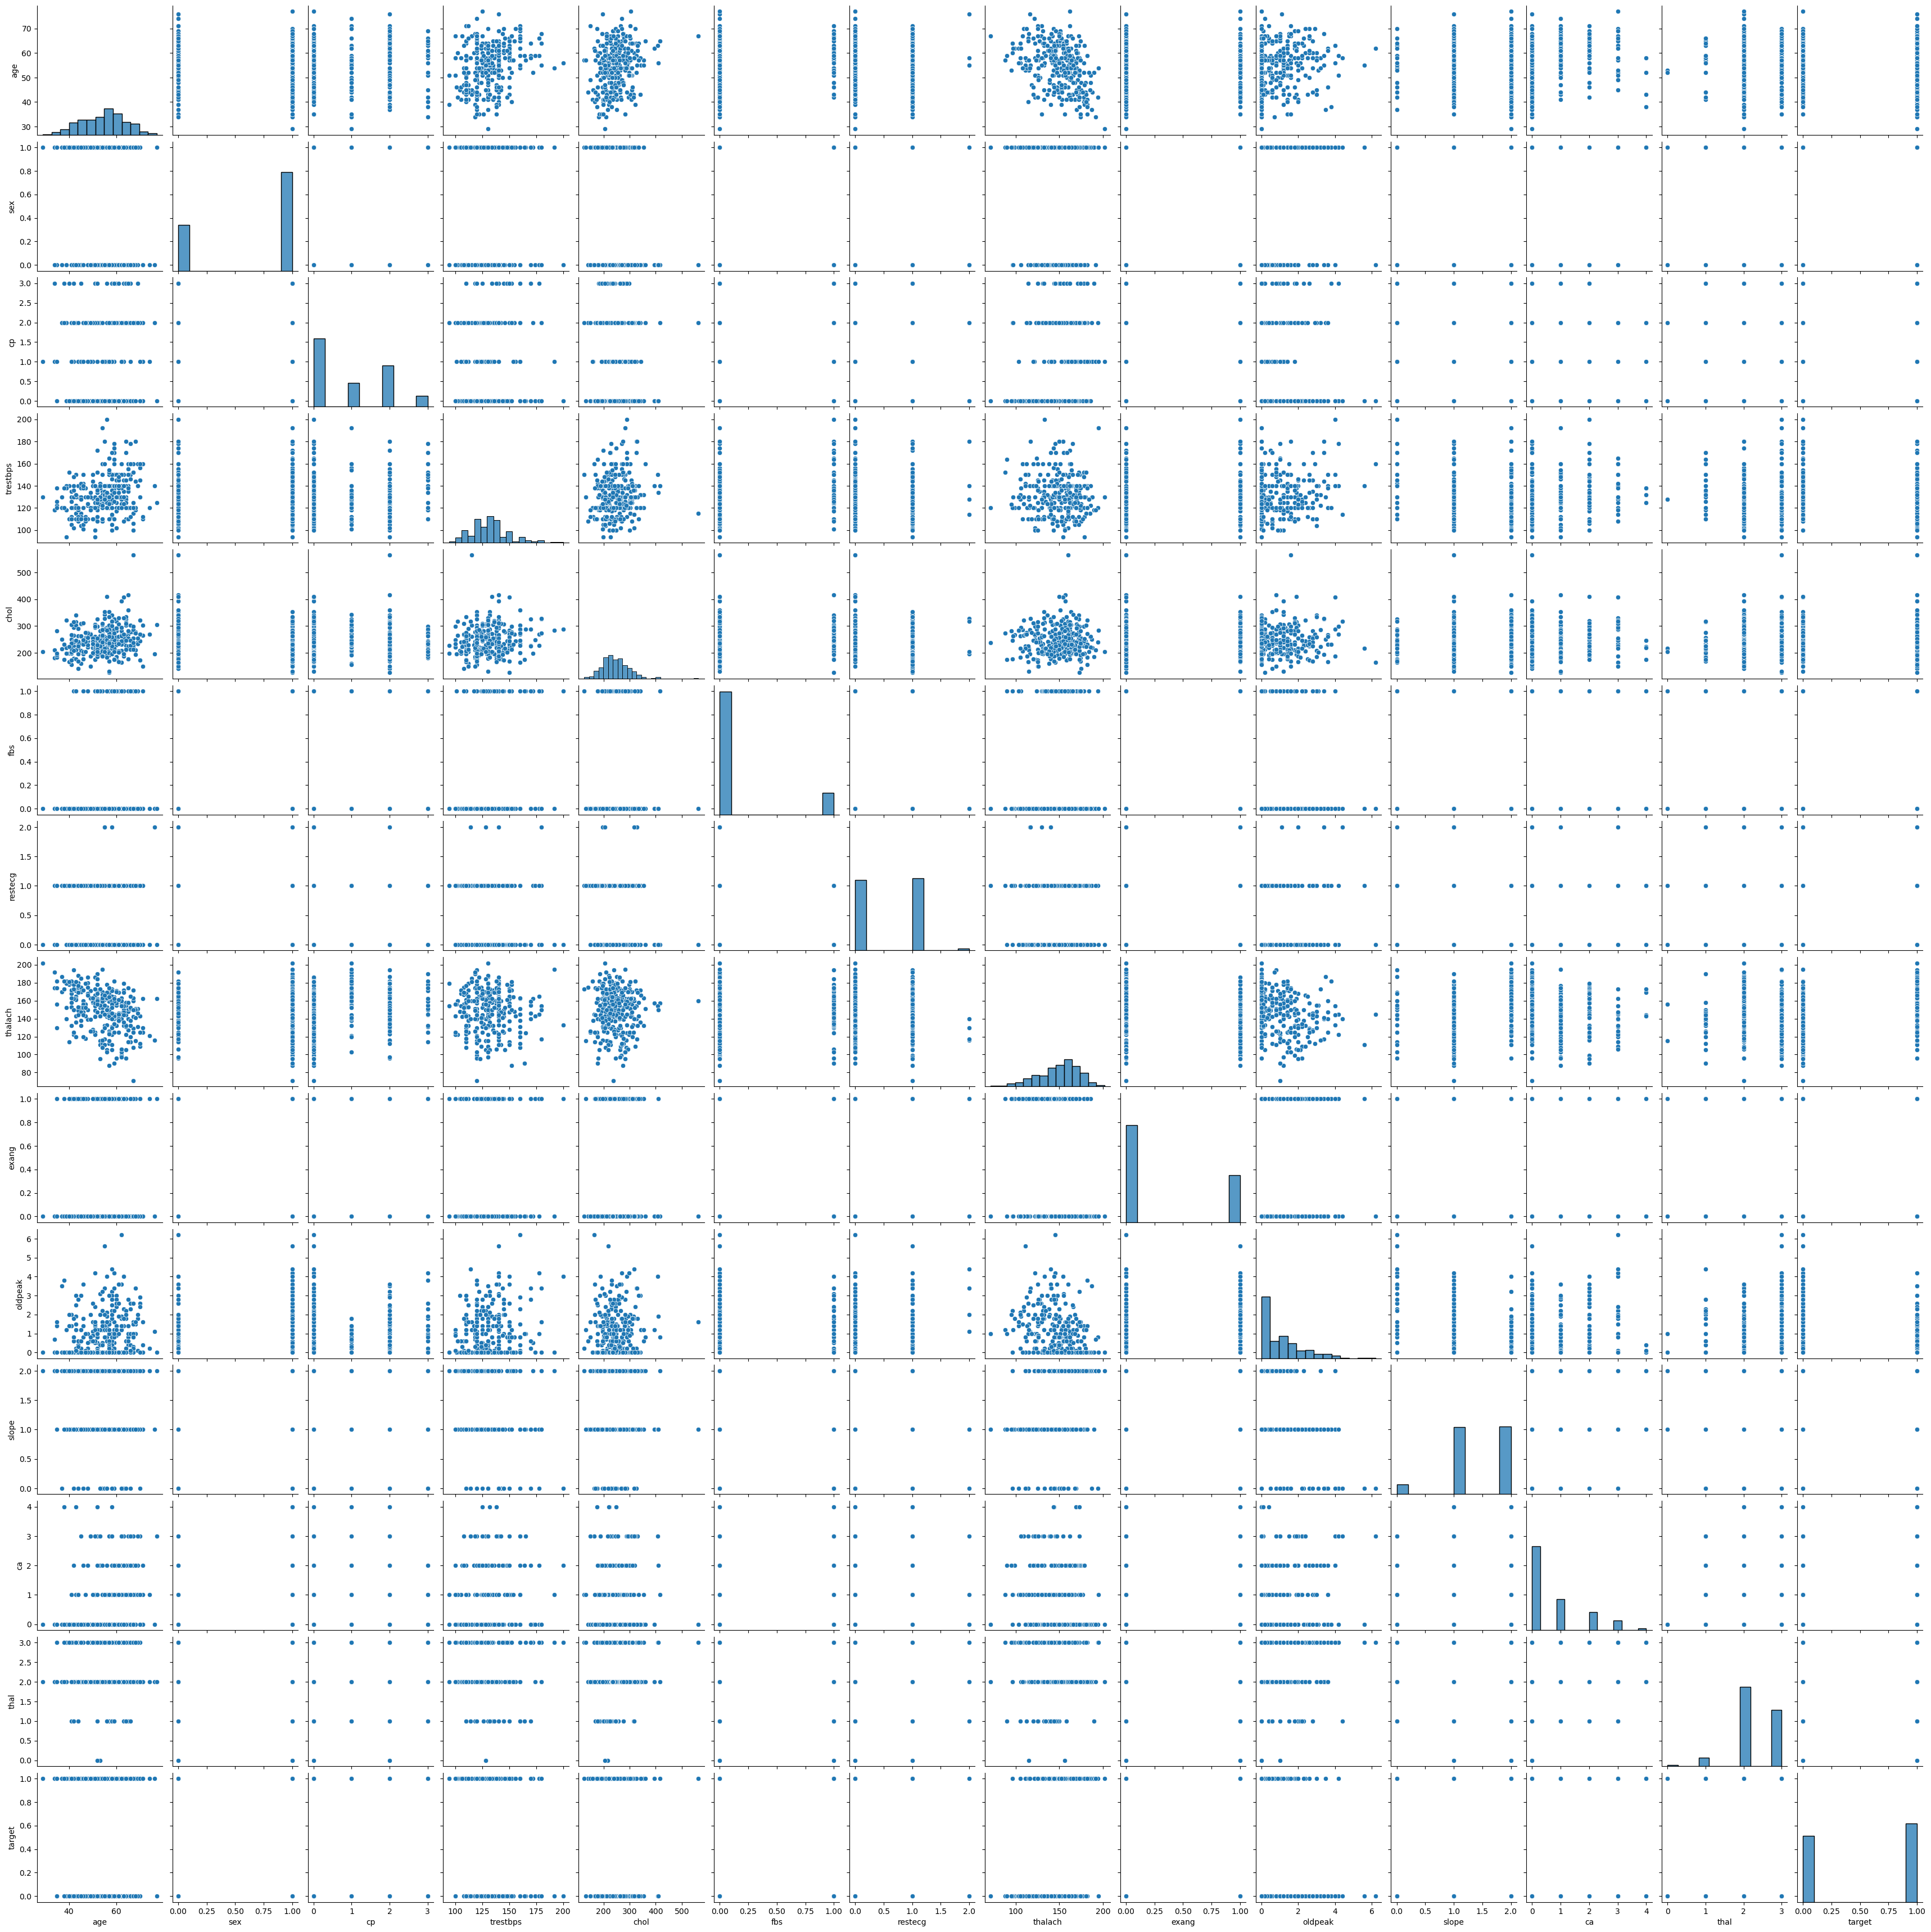

In [74]:
sns.pairplot(data=data)
plt.show()

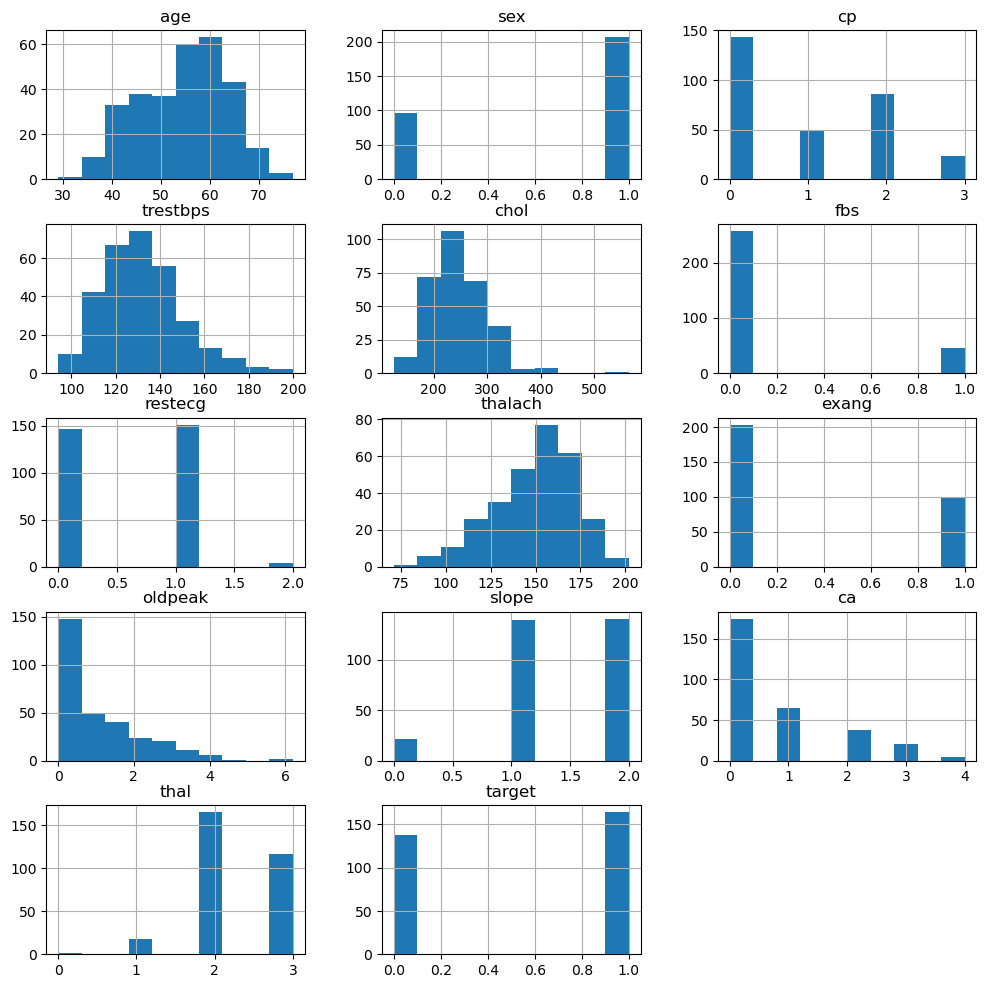

In [75]:
data.hist(figsize=(12,12),layout=(5,3))
plt.show()

In [76]:
data["sex"].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

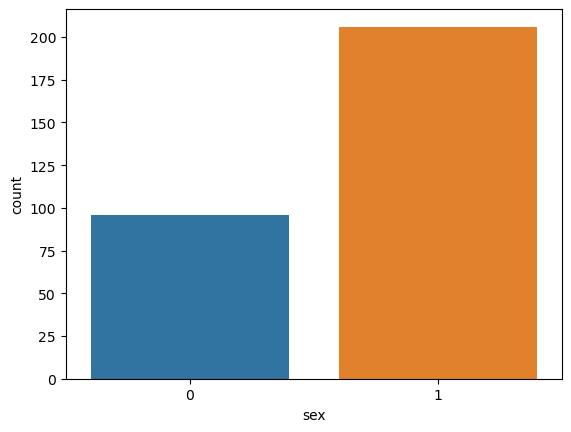

In [77]:
sns.countplot(x='sex',data=data)
plt.show()

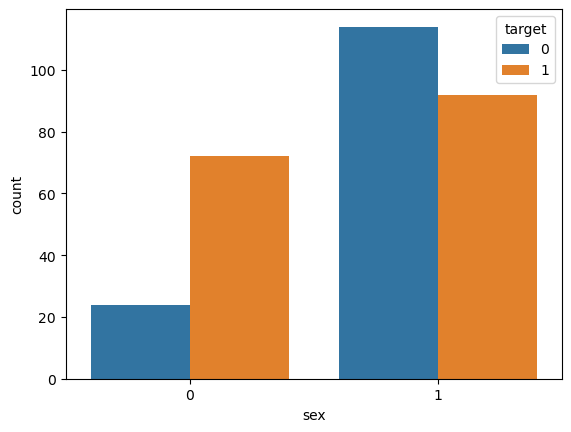

In [78]:
sns.countplot(x='sex',data=data,hue='target')
plt.show()

Here 1 means male and 0 denotes female. we observe female having heart disease are comparatively less when compared to males Males have low heart diseases as compared to females in the given dataset.

C:\Users\purab\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


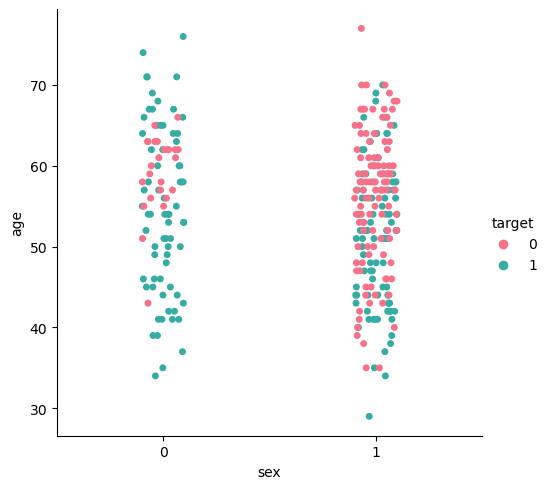

In [79]:
sns.catplot(data=data, x='sex', y='age',  hue='target', palette='husl')
plt.show()

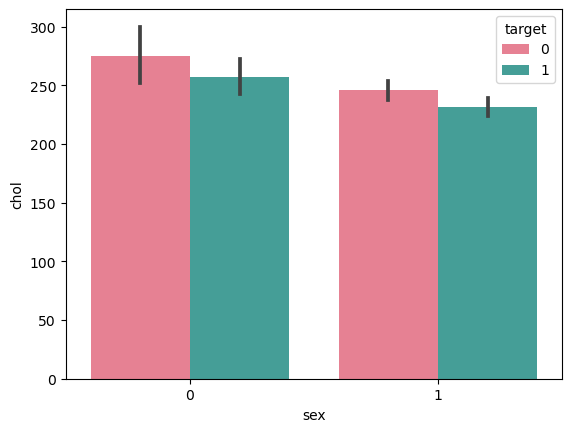

In [80]:
sns.barplot(data=data, x='sex', y='chol', hue='target', palette='husl')
plt.show()

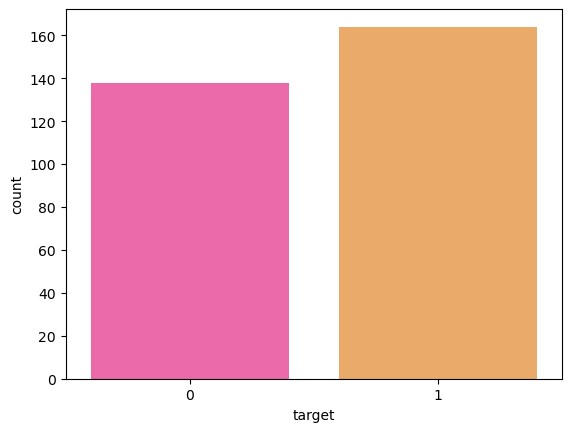

In [81]:
sns.countplot(x='target',palette='spring', data=data)
plt.show()

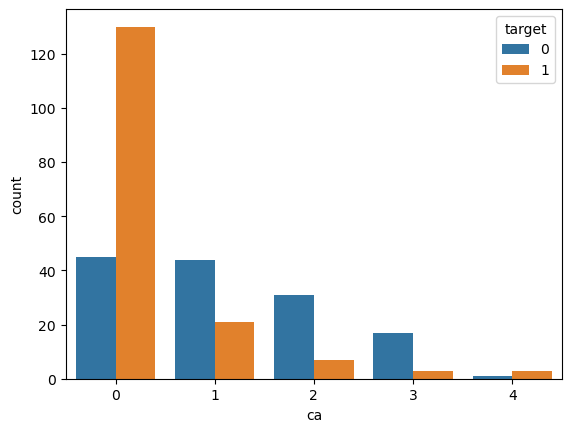

In [82]:
sns.countplot(x='ca',hue='target',data=data)
plt.show()

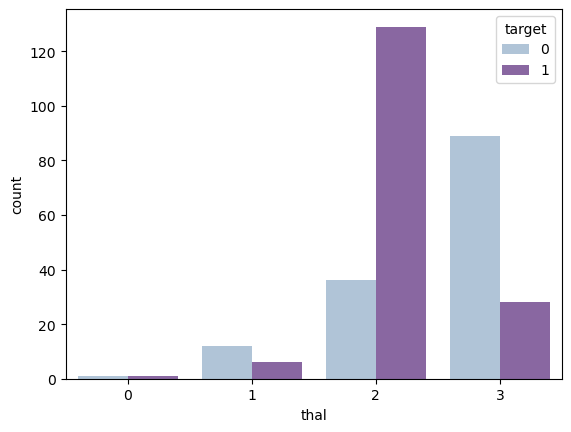

In [83]:
sns.countplot(x='thal',data=data, hue='target', palette='BuPu' )
plt.show()

C:\Users\purab\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


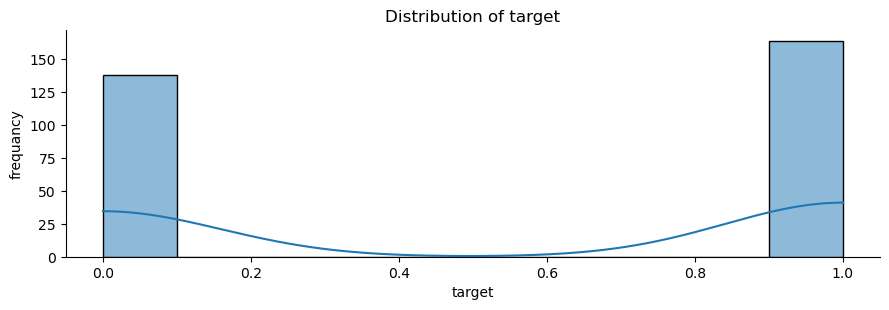

In [84]:
sns.displot(data['target'],kde =True,height=3,aspect=3)
plt.xlabel("target")
plt.ylabel("frequancy")
plt.title("Distribution of target")
plt.show()

In [85]:
data.target.skew()

-0.17369101189529737

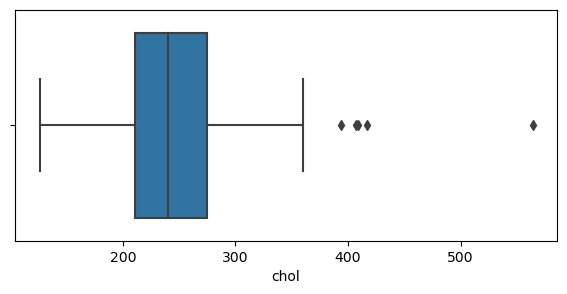

In [86]:
plt.figure(figsize=(7,3))
sns.boxplot(x='chol', data=data)
plt.show()

In [87]:
data=data[data['chol'] <= 370]

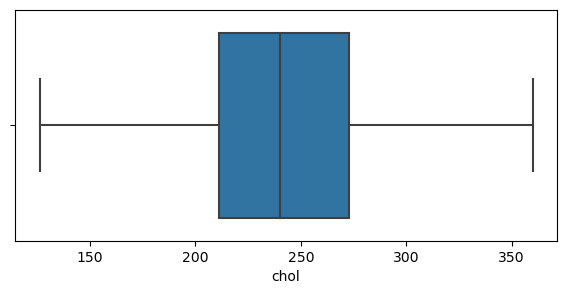

In [88]:
plt.figure(figsize=(7,3))
sns.boxplot(x='chol', data=data)
plt.show()

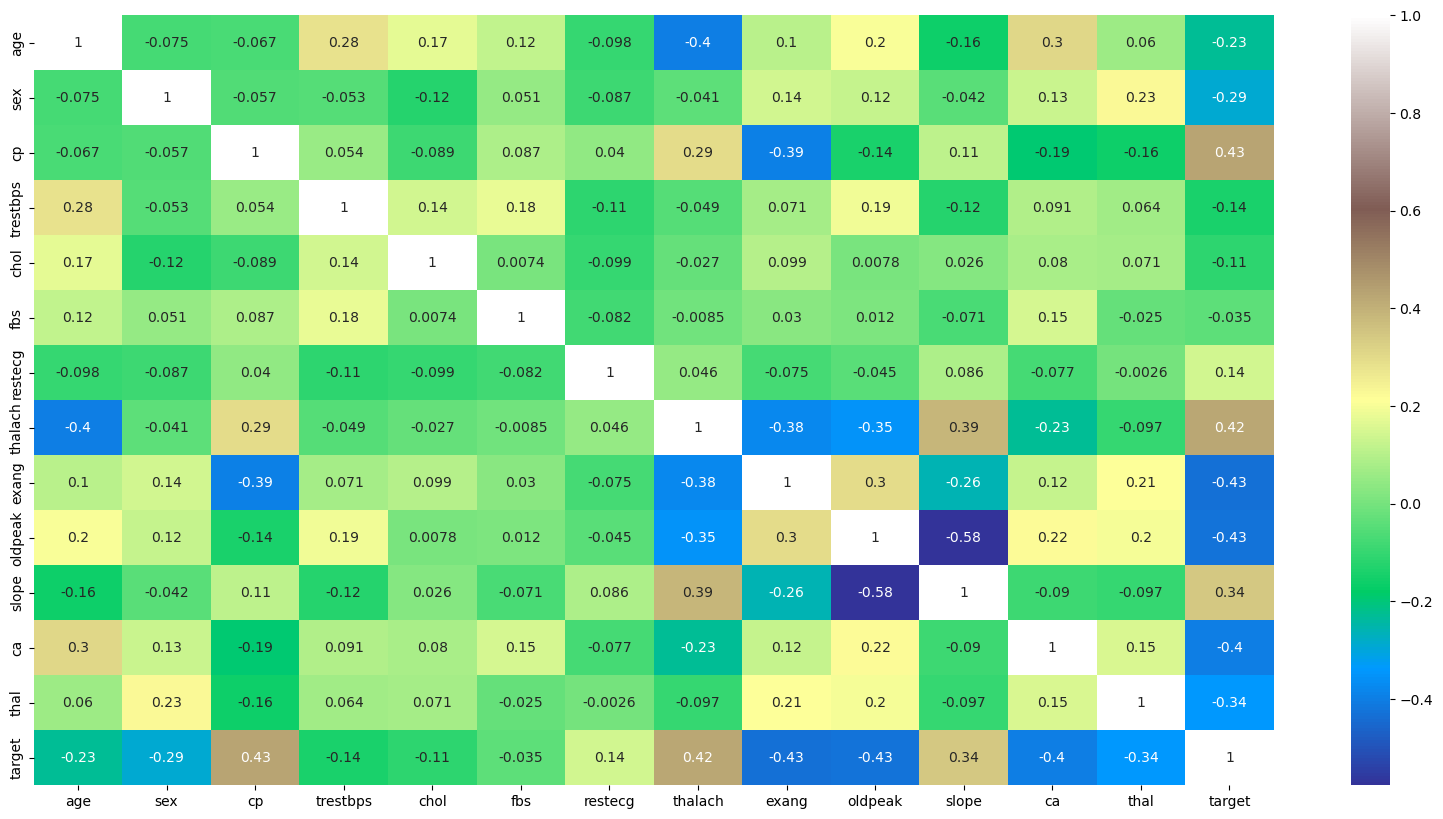

In [89]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='terrain')
plt.show()

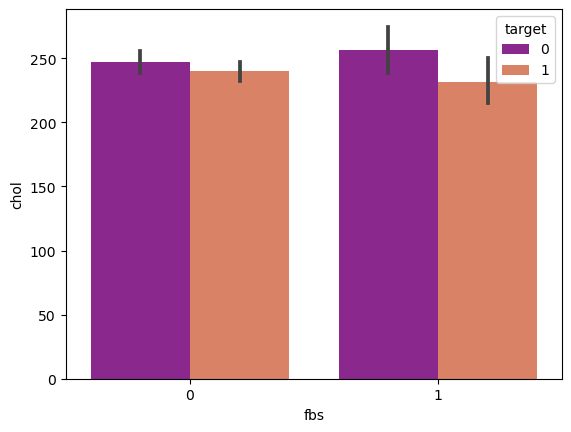

In [90]:
sns.barplot(x='fbs', y='chol', hue='target', data=data,palette='plasma' )
plt.show()

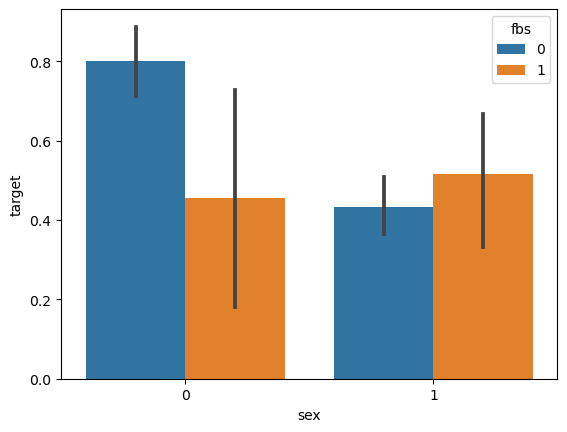

In [91]:
sns.barplot(x='sex',y='target', hue='fbs',data=data)
plt.show()

In [92]:
gen = pd.crosstab(data['sex'], data['target'])
print(gen)

target    0   1
sex            
0        22  69
1       114  92


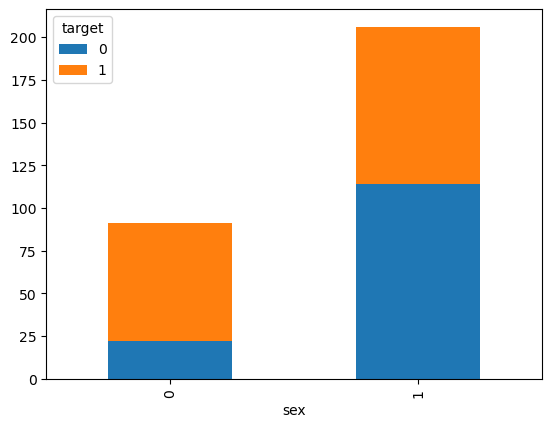

In [93]:
gen.plot(kind='bar', stacked=True, grid=False)
plt.show()

# Split and Scaling data

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
data[columns_to_scale] = StandardScaler.fit_transform(data[columns_to_scale])

In [95]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.965066,1,3,0.764857,-0.228685,1,0,0.023090,0,1.100899,0,0,1,1
1,-1.913358,1,2,-0.087003,0.149758,0,1,1.629024,0,2.139990,0,0,2,1
2,-1.470524,0,1,-0.087003,-0.874264,0,0,0.977969,0,0.321582,2,0,2,1
3,0.190106,1,1,-0.654909,-0.161901,0,1,1.238391,0,-0.197964,2,0,2,1
4,0.300814,0,0,-0.654909,2.464938,0,1,0.587337,1,-0.371145,2,0,2,1


In [96]:
X= data.drop(['target'], axis=1)
y= data['target']

In [97]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [98]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.965066,1,3,0.764857,-0.228685,1,0,0.023090,0,1.100899,0,0,1,1
1,-1.913358,1,2,-0.087003,0.149758,0,1,1.629024,0,2.139990,0,0,2,1
2,-1.470524,0,1,-0.087003,-0.874264,0,0,0.977969,0,0.321582,2,0,2,1
3,0.190106,1,1,-0.654909,-0.161901,0,1,1.238391,0,-0.197964,2,0,2,1
4,0.300814,0,0,-0.654909,2.464938,0,1,0.587337,1,-0.371145,2,0,2,1


In [99]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 2691
X_test- 1170
y_train- 207
y_test- 90


# SVM

In [100]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [101]:
svm=SVC()
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(y_test,prediction4)
cm4

array([[30, 10],
       [ 5, 45]], dtype=int64)

In [102]:
accuracy_score(y_test, prediction4)

0.8333333333333334

# Logistic Regression 

In [103]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [104]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction1)
cm

array([[33,  7],
       [ 7, 43]], dtype=int64)

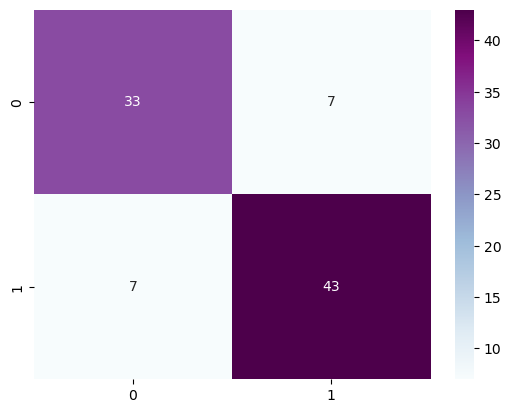

In [105]:
sns.heatmap(cm, annot=True,cmap='BuPu')
plt.show()

In [106]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction1)

0.8444444444444444

# Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
cm2= confusion_matrix(y_test,prediction2)
cm2

array([[32,  8],
       [13, 37]], dtype=int64)

In [108]:
accuracy_score(y_test,prediction2)

0.7666666666666667

# Random Forest Classifier

In [109]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
confusion_matrix(y_test, prediction3)

array([[34,  6],
       [ 9, 41]], dtype=int64)

In [110]:
accuracy_score(y_test, prediction3)

0.8333333333333334

In [111]:
print('lr :', accuracy_score(y_test, prediction1))
print('dtc :', accuracy_score(y_test, prediction2))
print('rfc :', accuracy_score(y_test, prediction3))
print('SVC :', accuracy_score(y_test, prediction4))

lr : 0.8444444444444444
dtc : 0.7666666666666667
rfc : 0.8333333333333334
SVC : 0.8333333333333334


# ROC CURVE

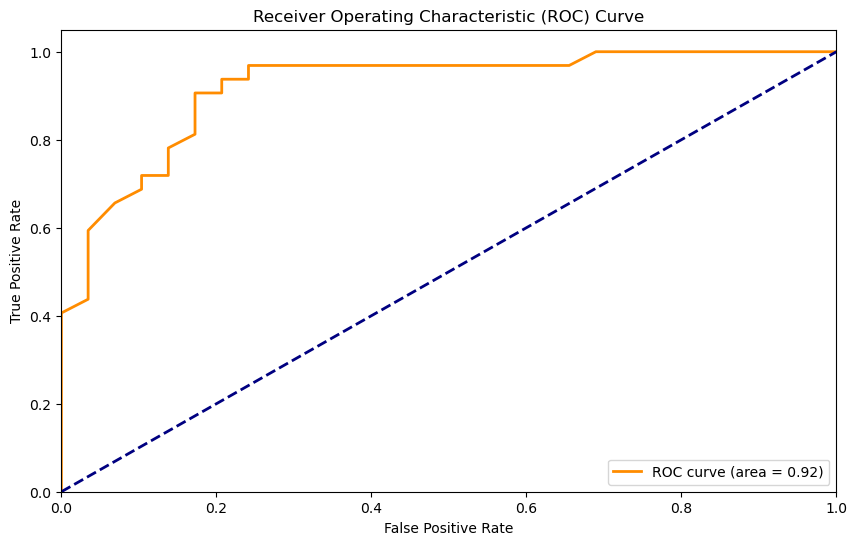

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

data = pd.read_csv("heart.csv")

X = data.drop(columns=['target'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

y_score = clf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
